# Maven Halloween Challenge

Goal - Use data to find 3 types of Halloween candy, that will make you the most popular house on the block.

Details --> Using online votes ranking 85 types of candy, your task is to find the 3 treats you will give out on Halloween to guarantee to trick-or-treaters of all tastes find something they will love and present the data to back up your decision.

## My Approach

1. **Python** - View the Data
2. **Python** - Apply PCA and jitter to prepare the data for a scatter plot
3.  **Tableau** - Explore the scatter plot and make recommendations. 

### View the data

In [2]:
import pandas as pd

In [3]:
pd.read_csv('candy-data.csv')

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [4]:
data=pd.read_csv('candy-data.csv')
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [6]:
subset=data.iloc[:, 1:-3]

subset.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
0,1,0,1,0,0,1,0,1,0
1,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


### Apply PCA (Principal Component Analysis)

In [7]:
from sklearn.decomposition import PCA

In [8]:
# n_components=2 means I want to convert my 9 columns of data into 2 columns
pca=PCA(n_components=2)

In [9]:
pca.fit(subset)

PCA(n_components=2)

#### 1) It means that after converting those 9 columns into 2 columns and after applying PCA, there are 60% of data is originally showing here.

#### 2) It shows these two columns are the decent representation of those two columns.

In [10]:
pca.explained_variance_ratio_

array([0.45736631, 0.15454393])

In [11]:
pca.transform(subset)

array([[ 1.30502069, -0.33597785],
       [ 1.12362774, -0.29469788],
       [ 0.03473265, -0.20408786],
       [ 0.03473265, -0.20408786],
       [-0.46904294, -0.56536867],
       [ 1.18283931, -0.01708112],
       [ 1.53241229, -0.26289151],
       [-0.13150424,  0.68535759],
       [-0.34121377,  0.52806173],
       [-0.26996792, -0.69085815],
       [ 1.12362774, -0.29469788],
       [-0.84498936,  0.16678093],
       [-0.84498936,  0.16678093],
       [-0.84498936,  0.16678093],
       [-0.66115949, -0.93654356],
       [-0.84498936,  0.16678093],
       [-0.66115949, -0.93654356],
       [-1.03710591, -0.20439396],
       [-0.84498936,  0.16678093],
       [-0.34121377,  0.52806173],
       [-0.84498936,  0.16678093],
       [-0.84498936,  0.16678093],
       [ 0.17141545,  0.8064985 ],
       [ 1.10594567, -0.21048836],
       [ 0.97312977, -0.17437697],
       [ 0.97312977, -0.17437697],
       [-1.03710591, -0.20439396],
       [ 0.17141545,  0.8064985 ],
       [ 1.10594567,

In [12]:
pd.DataFrame(pca.transform(subset))

,0,1
0,1.305021,-0.335978
1,1.123628,-0.294698
2,0.034733,-0.204088
3,0.034733,-0.204088
4,-0.469043,-0.565369
...,...,...
80,-0.469043,-0.565369
81,-0.661159,-0.936544
82,-0.844989,0.166781
83,0.041691,-0.700752


In [13]:
candy_2d=pd.DataFrame(pca.transform(subset))

candy_2d.head()

,0,1
0,1.305021,-0.335978
1,1.123628,-0.294698
2,0.034733,-0.204088
3,0.034733,-0.204088
4,-0.469043,-0.565369


<Axes: xlabel='0', ylabel='1'>

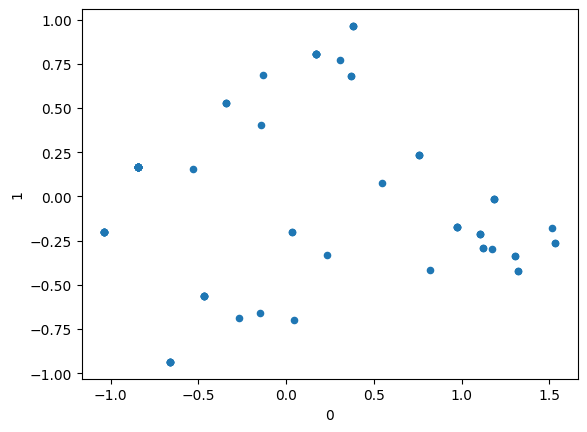

In [14]:
candy_2d.plot(kind='scatter', x=0, y=1)

**As you can see, some dots are present in each of others. Here is not 85 data points are actually showing.**

#### It means they are overlapping each other.

### To solve this issue, we will be using Jitter.

### We use Jitter, so the data points will be spreading from each other.

In [18]:
import numpy as np

In [22]:
np.random.randn()

-0.35734490229357757

In [23]:
np.random.randn(85)

array([ 1.69611287, -1.84129211,  0.52150619,  0.08102333, -0.61703886,
       -0.5319207 ,  1.47505309, -0.07916278,  1.07847845,  0.01551924,
       -0.26221489, -0.6822161 ,  0.32872183, -0.78749035, -0.57917701,
        0.51590971, -0.02453309, -0.2839954 ,  2.85743965, -0.6426103 ,
        1.03568678, -0.75152488, -0.22730605, -0.49316455,  0.4321389 ,
       -0.03844436, -1.56769454, -1.03521095, -1.79229649, -0.44216572,
       -0.57780893,  0.21510053, -1.61701363,  0.08670414, -0.33895683,
       -1.17375767, -1.08403956, -0.74171897,  0.65702279, -0.27171247,
       -0.32984923,  0.18634577,  1.00685575,  2.36944873, -1.43256089,
       -1.19137238,  0.5697644 , -1.27992073, -0.80492081,  1.49965564,
       -0.15168537,  0.10978771, -0.96971326, -0.81787165, -0.60140664,
       -0.04790098,  0.82079825,  0.40679798,  1.63320804, -0.43318843,
        0.83358154, -0.32887644,  0.13702419, -0.76314957,  0.92380303,
       -1.51018629,  0.70623183,  0.58037913,  0.07509196, -0.80

<Axes: xlabel='x_jitter', ylabel='y_jitter'>

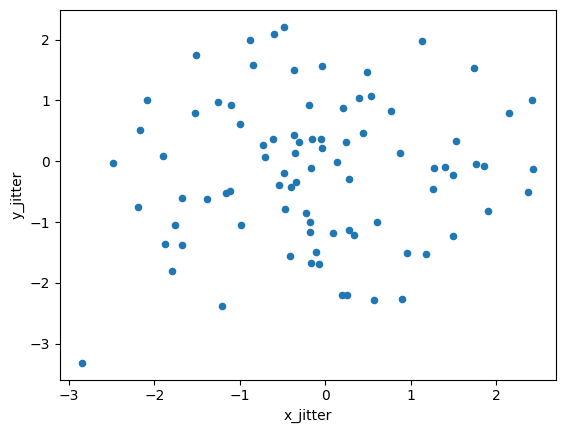

In [24]:
data['x_jitter']=candy_2d[0]+ np.random.randn(85)

data['y_jitter']=candy_2d[1]+ np.random.randn(85)

data.plot(kind='scatter', x='x_jitter', y='y_jitter')

#### As you can see it seems like a one blob cause there is two much noise added here.

### So we multiplied by 0.1 to reduce it to just 10% of the original noise.

<Axes: xlabel='x_jitter_new', ylabel='y_jitter_new'>

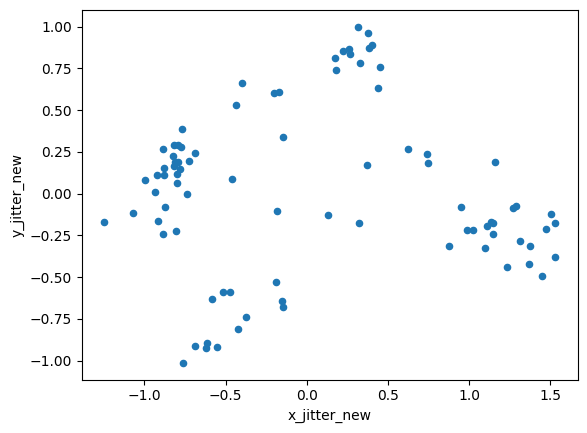

In [25]:
data['x_jitter_new']=candy_2d[0]+ np.random.randn(85)*.1

data['y_jitter_new']=candy_2d[1]+ np.random.randn(85)*.1

data.plot(kind='scatter', x='x_jitter_new', y='y_jitter_new')

#### So, as you can see the Jitter is much more subtle and we can easily label them as different clusters.

In [26]:
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,x_jitter,y_jitter,x_jitter_new,y_jitter_new
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0.250172,-2.194310,1.370670,-0.421576
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1.738672,1.526988,1.098759,-0.328054
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,1.406708,-0.090045,-0.183822,-0.102115
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,-0.041601,0.217593,0.132756,-0.130310
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,-1.875826,-1.355936,-0.373341,-0.737320


In [31]:
data.to_excel('Candy_PCA.xlsx')